# Assignment 2
## Introduction to Data Analytics
### Humber College - March 2022
#### Name: Nguyen Anh Tuan Le
#### Student ID: N014141295

1. Import necessary libraries

In [1543]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

2. Read the given csv file as a dataframe.

In [1544]:
df = pd.read_csv("Realestate.csv")

3. Perform exploratory data analysis (EDA). For example, single variate and
bivariate analysis. Write your observations.

In [1545]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [1546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [1547]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [1548]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

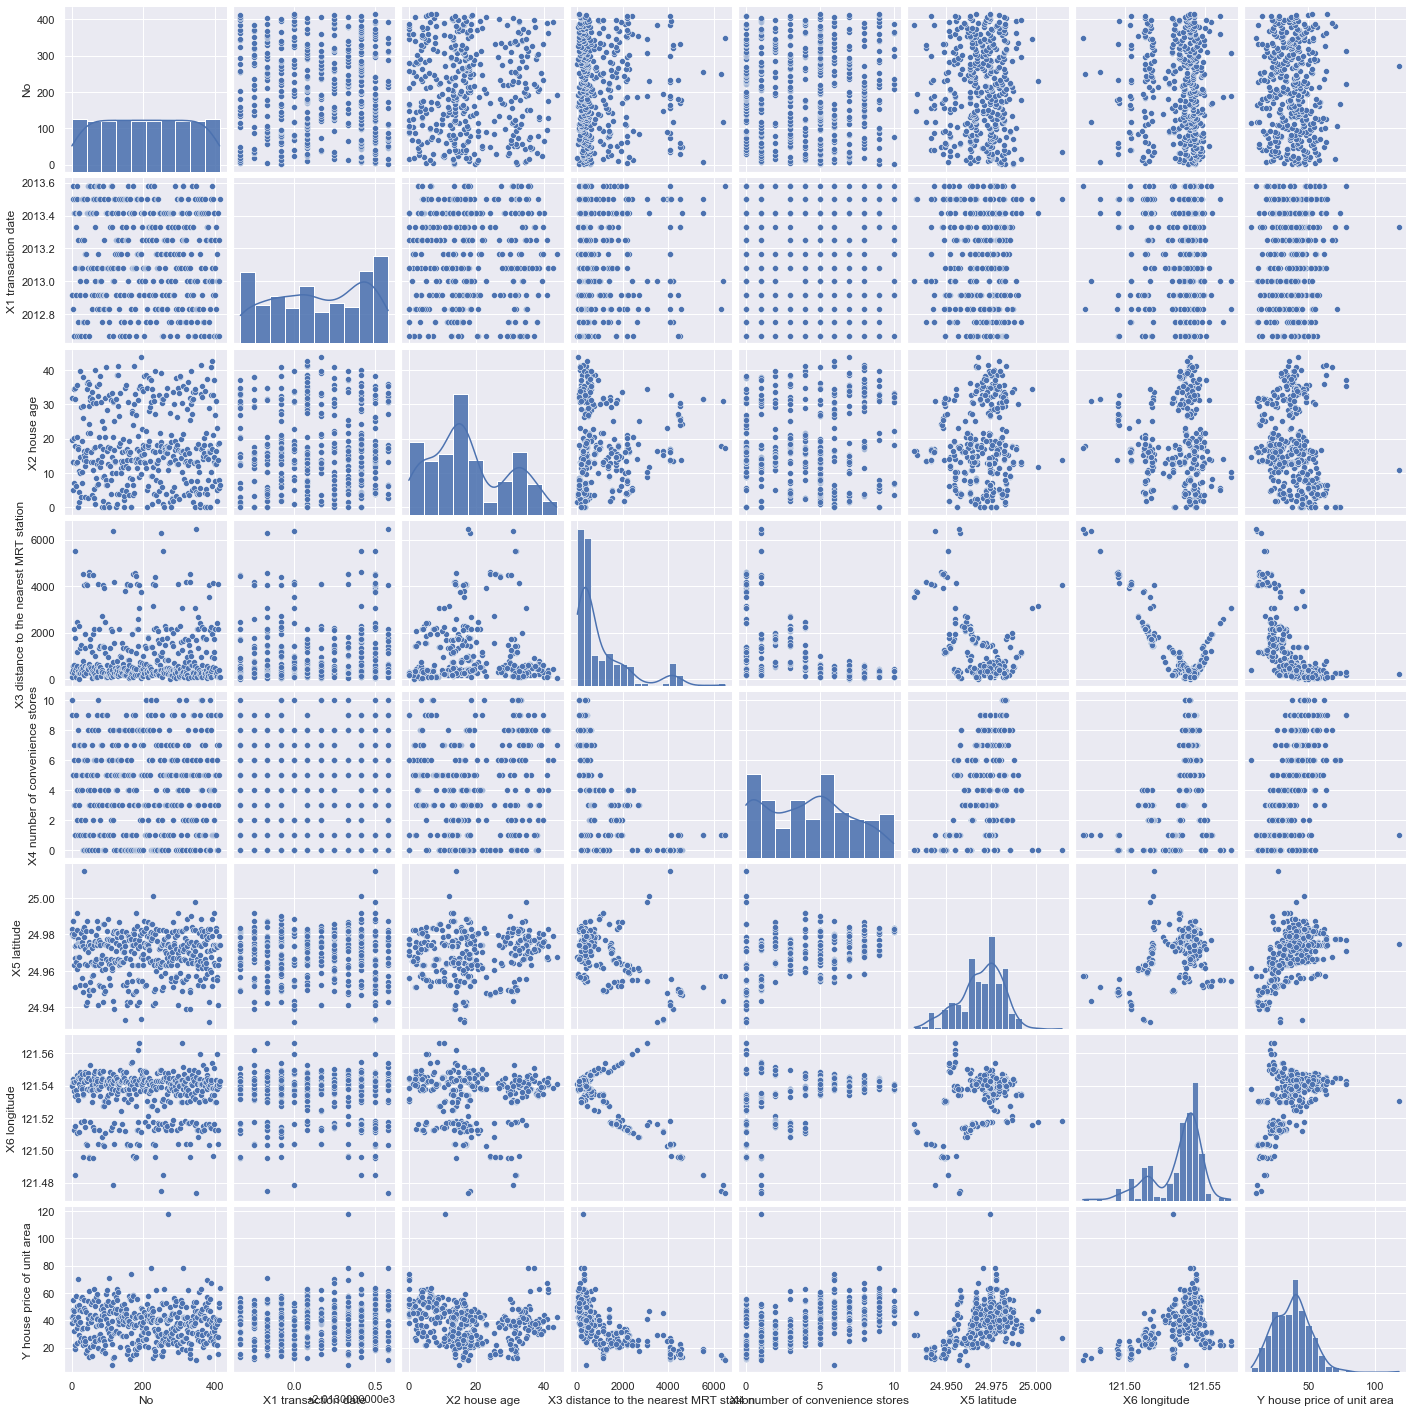

In [1549]:
sns.set()
sns.pairplot(df).map_diag(sns.histplot, kde=True)

<AxesSubplot:>

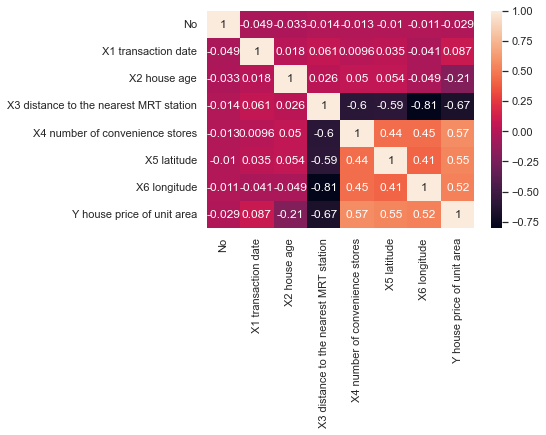

In [1550]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='X1 transaction date', ylabel='Count'>

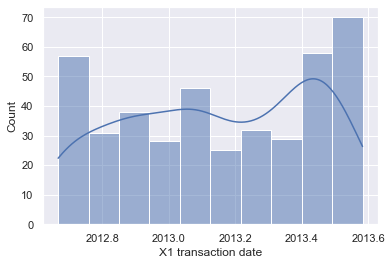

In [1551]:
sns.histplot(df['X1 transaction date'], kde=True)

<AxesSubplot:xlabel='X2 house age', ylabel='Count'>

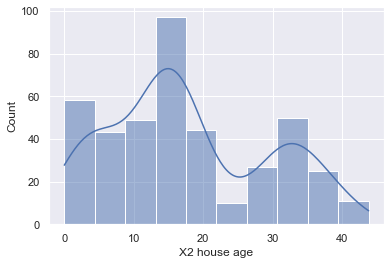

In [1552]:
sns.histplot(df['X2 house age'], kde=True)

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Count'>

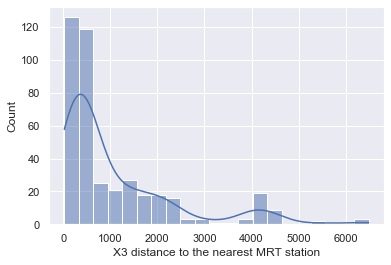

In [1553]:
sns.histplot(df['X3 distance to the nearest MRT station'], kde=True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Count'>

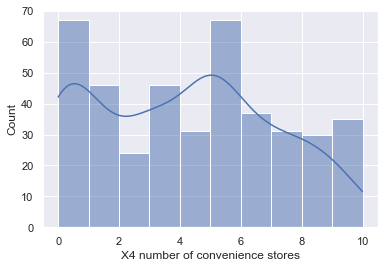

In [1554]:
sns.histplot(df['X4 number of convenience stores'], kde=True)

<AxesSubplot:xlabel='X5 latitude', ylabel='Count'>

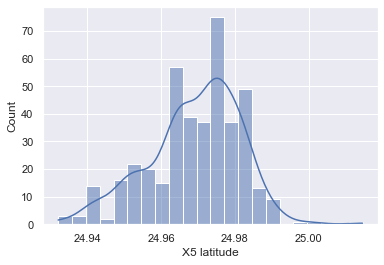

In [1555]:
sns.histplot(df['X5 latitude'], kde=True)

<AxesSubplot:xlabel='X6 longitude', ylabel='Count'>

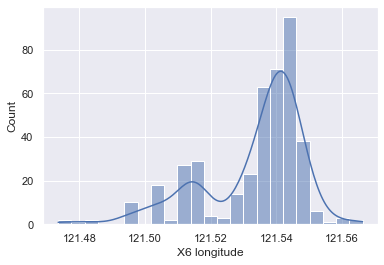

In [1556]:
sns.histplot(df['X6 longitude'], kde=True)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

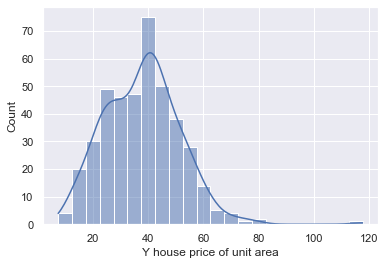

In [1557]:
sns.histplot(df['Y house price of unit area'], kde=True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

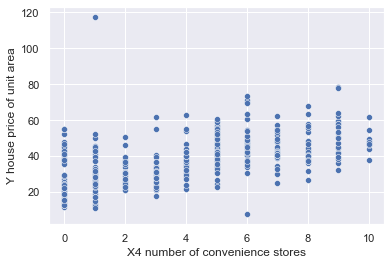

In [1558]:
sns.scatterplot(x=df['X4 number of convenience stores'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X5 latitude', ylabel='Y house price of unit area'>

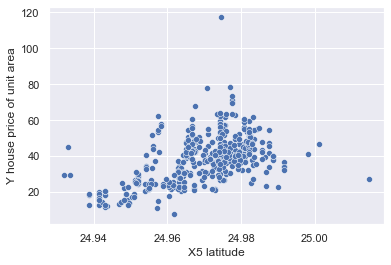

In [1559]:
sns.scatterplot(x=df['X5 latitude'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>

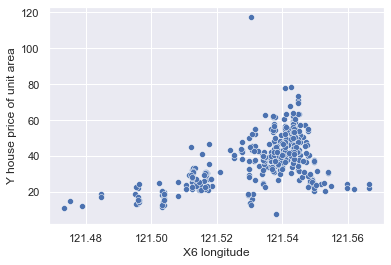

In [1560]:
sns.scatterplot(x=df['X6 longitude'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X6 longitude', ylabel='X4 number of convenience stores'>

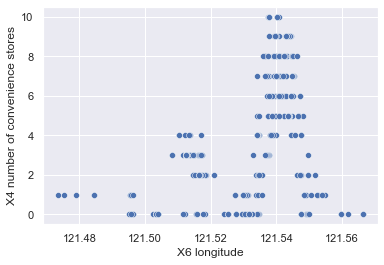

In [1561]:
sns.scatterplot(x=df['X6 longitude'], y=df['X4 number of convenience stores'])

<AxesSubplot:xlabel='X5 latitude', ylabel='X4 number of convenience stores'>

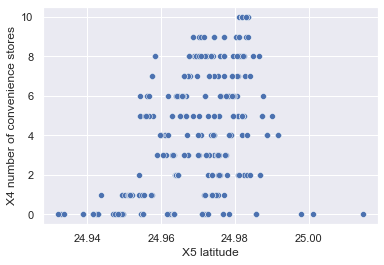

In [1562]:
sns.scatterplot(x=df['X5 latitude'], y=df['X4 number of convenience stores'])

#### Exploratory Data Analysis (EDA)
- Univariate Data Analysis
    - X1 transaction date: appears to spread quite evenly between mid 2012 and mid 2013, and follow a negatively skewed distribution with the peak around early-mid 2013
    - X2 house age: follows a positively skewed distribution with the majority of the properties' age is roughly 17 year-old
    - X3 distance to the nearest MRT station: has a positively skewed distribution with most of the properties are near to a MRT station within under 1000m
    - X4 number of convenience stores: leans slightly toward a negatively skewed distribution with peaks at 0 and 5 stores
    - X5 latitude: almost has a symmetrical distribution but generally has a positively skewed distribution with a peak around 24.97
    - X6 longitude: has a slight negatively skewed distribution with a peak around 121.55
    - Y house price of unit area: projects a positively skewed distribution with a peak around 50
- Bivariate Data Analysis
    - Y house price of unit area vs X4 number of convenience stores:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - Y house price of unit area vs X5 latitude:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - Y house price of unit area vs X6 longitude:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - X4 number of convenience stores vs X6 longitude:
        - Direction: positive
        - Form: non-linear
        - Strength: moderate
        - Outliers: yes
    - X4 number of convenience stores vs X5 latitude:
        - Direction: positive
        - Form: non-linear
        - Strength: moderate
        - Outliers: yes

4. Based on your analysis, choose a number of features (as inputs) for prediction of the “house price of unit area”. Prepare the input and target (output) variables.

In [1563]:
X = df[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

5. Split the data into training and test dataset (20% test).

In [1564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 3) (331,) (83, 3) (83,)


6. Perform any necessary preprocessing step (e.g. normalization, replacing
missing values, etc.)

In [1565]:
X_train['X4 number of convenience stores'] = X_train['X4 number of convenience stores']/np.max(X_train['X4 number of convenience stores'])
X_train['X5 latitude'] = X_train['X5 latitude']/np.max(X_train['X5 latitude'])
X_train['X6 longitude'] = X_train['X6 longitude']/np.max(X_train['X6 longitude'])
X_test['X4 number of convenience stores'] = X_test['X4 number of convenience stores']/np.max(X_test['X4 number of convenience stores'])
X_test['X5 latitude'] = X_test['X5 latitude']/np.max(X_test['X5 latitude'])
X_test['X6 longitude'] = X_test['X6 longitude']/np.max(X_test['X6 longitude'])

7. Use two regression models of your choice to predict house price from
the selected features in Step 4.

In [1566]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
print(lm_pred)
lm.score(X_test, y_test)

[12.4555484  26.42429554 44.0734736  26.24757157 47.42905543 32.55408509
 44.29934572 43.11822837 34.36517217 31.13144687 30.78522008 29.85262749
 40.34355891 38.33597531 43.22165242 37.51533643 31.48427415 44.48158535
 46.24802516 37.03361803 34.5575669  41.78977069 36.31298398 12.86009874
 12.96396931 42.93958333 36.27791087 26.73993992 11.52935152 30.1181672
 41.78977069 42.93958333 12.51269701 46.24802516 35.73940059 30.58776572
 31.84054852 45.68489647 37.03361803 33.37308671 43.71099908 26.17529017
 29.69549026 40.65201998 42.93958333 26.42429554 43.94188647 28.94765676
 28.37016616 46.62889004 12.97332929 36.04721129 12.85685889 37.03361803
 40.47488517 35.04321849 31.33867768 47.42905543 27.51158858 30.17259986
 37.45054507 39.52735122 29.7397775  30.1181672  38.40355224 27.51158858
 12.85685889 27.67000801 42.7646553  46.24802516 42.93958333 42.06800599
 40.73568969 39.03153949 29.74698804 44.0734736  42.70836008 43.05014112
 40.87774121 45.19346793 36.04721129 12.86009874 34.

0.5155515010328072

In [1567]:
pm = make_pipeline(PolynomialFeatures(), LinearRegression())
pm.fit(X_train, y_train)
pm_pred = pm.predict(X_test)
print(pm_pred)
pm.score(X_test, y_test)

[17.23440248 28.17587063 51.50853692 27.45485584 54.93885297 37.62250584
 54.90780928 47.65252153 32.9719153  32.10030413 32.12440883 15.89816143
 50.40206371 39.39308802 45.71494035 38.95940445 32.53224727 61.54499936
 59.85797886 40.67602509 39.25057481 44.33032074 39.77511613 16.81234206
  9.84358978 45.40752763 36.93959232 29.73007627 16.57342125 17.82135323
 44.33032074 45.40752763  8.87506615 59.85797886 39.96122801 16.85762261
 32.97801927 54.82191925 40.67602509 33.24572522 56.0801372  27.74080943
 29.38900638 50.34253223 45.40752763 28.17587063 54.2819603  29.12744685
 28.96446481 52.02035273 18.54930472 49.62303779 17.62309171 40.67602509
 49.9927282  29.23591059 30.46580261 54.93885297 10.55117237  0.70770621
 38.88189611 42.21023386 29.71324118 17.82135323 45.14270556 10.55117237
 17.62309171 11.65318456 42.68532582 59.85797886 45.40752763 49.58181453
 43.22988725 37.76902201 33.26181293 51.50853692 46.80849724 47.2358724
 48.78375609 61.35435633 49.62303779 16.81234206 35.

0.49725361368896737

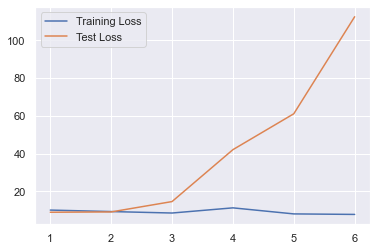

In [1568]:
collect_training_loss = []
collect_test_loss = []
collect_m = []
for m in range(1, 7):
    poly_model = make_pipeline(PolynomialFeatures(degree=m),LinearRegression())
    poly_model.fit(X_train, y_train)
    yfit = poly_model.predict(X_test)
    yfit_training = poly_model.predict(X_train)
    collect_test_loss.append(np.sqrt(metrics.mean_squared_error(y_test, yfit)))
    collect_training_loss.append(np.sqrt(metrics.mean_squared_error(y_train, yfit_training)))
    collect_m.append(m)

sns.lineplot(x=collect_m,y=collect_training_loss)
sns.lineplot(x=collect_m,y=collect_test_loss)
plt.legend(labels=['Training Loss', 'Test Loss'])

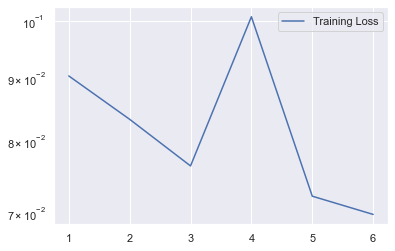

In [1569]:
maxi = np.max([np.max(collect_training_loss),np.max(collect_test_loss)])
g_results = sns.lineplot(x=collect_m, y=collect_training_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Training Loss'])

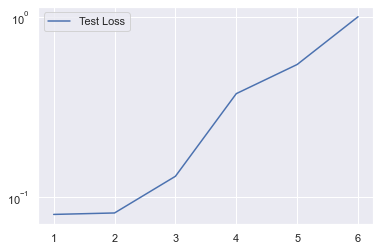

In [1570]:
g_results = sns.lineplot(x=collect_m, y=collect_test_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Test Loss'])

The optimal m is 2 (default)

8. Evaluate and compare the models using MAE, MSE, and RMSE metrics on the test dataset. Use tables or plots of your choice to compare the models. Discuss which model is better.

In [1571]:
print('MAE LM:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE LM:', metrics.mean_squared_error(y_test, lm_pred))
print('RMSE LM:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print('MAE PM:', metrics.mean_absolute_error(y_test, pm_pred))
print('MSE PM:', metrics.mean_squared_error(y_test, pm_pred))
print('RMSE PM:', np.sqrt(metrics.mean_squared_error(y_test, pm_pred)))

MAE LM: 6.7979933990701555
MSE LM: 81.22221059174828
RMSE LM: 9.012336577810899
MAE PM: 6.88267746007586
MSE PM: 84.2900183409598
RMSE PM: 9.180959554477942


<AxesSubplot:ylabel='Y house price of unit area'>

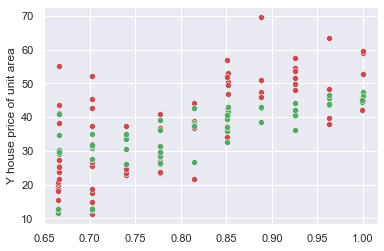

In [1572]:
sns.scatterplot(x=X_test.mean(axis=1), y=y_test, color='r')
sns.scatterplot(x=X_test.mean(axis=1), y=lm_pred, color='g')

<AxesSubplot:ylabel='Y house price of unit area'>

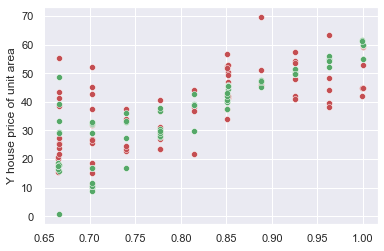

In [1573]:
sns.scatterplot(x=X_test.mean(axis=1), y=y_test, color='r')
sns.scatterplot(x=X_test.mean(axis=1), y=pm_pred, color='g')

"The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model." => LinearRegression model predicts better than PolynomialFeatures model in this case. Base on my observation, the models' accuracies can change from time to time. As a result, PolynomialFeatures model predicts better than LinearRegression model sometimes.